In [1]:
import sys
sys.path.insert(0, "../")

import fairlearn.grid_search.binary_protected_attribute.binary_classification as bc

import numpy as np
import pandas as pd

from test import simple_learners

In [2]:
def simple_threshold_data(number_a0, number_a1,
                          a0_threshold, a1_threshold,
                          a0_label, a1_label):

    a0s = np.full(number_a0, a0_label)
    a1s = np.full(number_a1, a1_label)

    a0_scores = np.linspace(0, 1, number_a0)
    a1_scores = np.linspace(0, 1, number_a1)
    score_feature = np.concatenate((a0_scores, a1_scores), axis=None)

    A = np.concatenate((a0s, a1s), axis=None)

    Y_a0 = [x > a0_threshold for x in a0_scores]
    Y_a1 = [x > a1_threshold for x in a1_scores]

    Y = np.concatenate((Y_a0, Y_a1), axis=None)

    X = pd.DataFrame({"actual_feature": score_feature,
                      "protected_attribute_feature": A,
                      "constant_ones_feature": np.ones(len(Y))})
    return X, Y, A

In [3]:
num_samples_a0 = 40
num_samples_a1 = 40

score_threshold = 0.5

a0_label = 45
a1_label = 18

X, Y, A = simple_threshold_data(num_samples_a0, num_samples_a1, score_threshold, score_threshold, a0_label, a1_label)

In [4]:
import matplotlib.pyplot as plt

In [5]:
mask_a0 = X["protected_attribute_feature"] == a0_label

In [6]:
mask_a0

0      True
1      True
2      True
3      True
4      True
      ...  
75    False
76    False
77    False
78    False
79    False
Name: protected_attribute_feature, Length: 80, dtype: bool

In [7]:
X_a0 = X[mask_a0]

In [8]:
Y_a0 = Y[mask_a0]

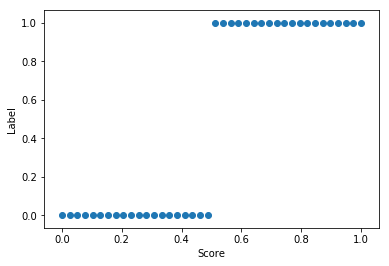

In [9]:
plt.scatter(X_a0["actual_feature"], Y_a0)
plt.xlabel("Score")
plt.ylabel("Label")
plt.show()